# Lab 2a: 


Lab associated with Module 2a: Trees

***

In [285]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [286]:
import numpy as np

Following libraries have to be installed on your computer. Try to install graphviz by using: conda install python-graphviz

I made use of some of the following links to get rid of errors:
    
https://github.com/quadram-institute-bioscience/albatradis/issues/7

https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

https://github.com/xflr6/graphviz/issues/68

https://github.com/RedaOps/ann-visualizer/issues/12


On my mac computer I had to install some packages using brew to get rid of following error: "ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH"

brew install graphviz

In [287]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Testing Visualization Package

Let us test this visualization Digraph Pacakge, it is only a tool for displaying tree or graph, this will come handy as it helps to visualize our solution.

In [288]:
dot = Digraph()

dot.node("1")
dot.node("2")
dot.edges(['12'])

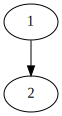

In [289]:
dot

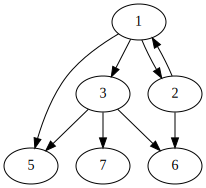

In [290]:
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('1')
dot.node('3')
dot.node('2')
dot.node('5')
dot.node('6')
dot.node('7')

# Add edges
dot.edges(['12', '13', '35', '15', '21', '37', '36', '26'])

# Visualize the graph
dot

***

### Section 2: Creating a Binary Search Tree

Let us start by creating a BST

We will keep code simple in the sense that we will make a node class, and then build functions outside the class to implement various functionality.

In [291]:
class Node:
    
    def __init__(self, value):

        self.val = value
        self.right = None
        self.left = None
        self.parent = None
    



def buildBinaryTree(nodes):
    
    if len(nodes) == 0:
        raise ValueError('list is empty')
        
    return binaryTree(nodes, 0, len(nodes) - 1)
        
def binaryTree(nodes, start, end):
    
    if start > end:
        return
    
    middle = (start + end) // 2
    root = Node(nodes[middle])
    root.left = binaryTree(nodes, start, middle - 1)
    root.right = binaryTree(nodes, middle + 1, end)
    
    return root

In [292]:
test1 = [1, 2, 3, 4, 5, 6, 7, 8]
test2 = [-1, 0, 9, 10]

In [293]:
test1_tree = buildBinaryTree(test1)
test2_tree = buildBinaryTree(test2)

We will make the simpler assumption that all the keys are unique when we are inserting

In [294]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

In [295]:
test3_tree = buildBinaryTree(test3)

Okay now that we have build three trees, let us visualize them. For visualization, we will have to write another function.

In [296]:
def visualize_tree(tree):
    
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.val))

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.val))
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.val))
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    
    return dot

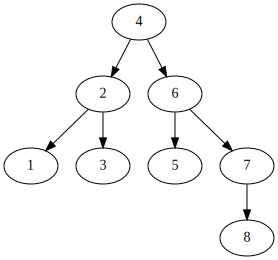

In [297]:
dot = visualize_tree(test1_tree)

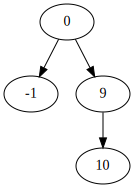

In [298]:
dot = visualize_tree(test2_tree)

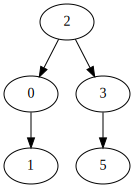

In [299]:
dot = visualize_tree(test3_tree)

***

### Section 3: Implementing Search, Insert and Delete Operations

Let us implement IDS operations on the BST we have built

Search operation should look like:

In [300]:
def search(nodes, val):

    if val == nodes.val:
        return True

    if val < nodes.val:
        
        if nodes.left == None:
            return False

        return search(nodes.left, val)

    elif val >= nodes.val:
        
        if nodes.right == None:
            return False

        return search(nodes.right, val)

In [301]:
search(test3_tree, 3)

True

In [302]:
search(test1_tree, 18)

False

Let us write insert function now:

In [303]:
def insert(nodes, val):

    # Empty Tree
    if nodes == None:
        nodes = Node(val)
        return

    # Value already exist on the node
    if nodes.val == val:
        return

    if val < nodes.val:

        if nodes.left == None: 
            nodes.left = Node(val)
            return
        else:
            insert(nodes.left, val)
            return

    elif val >= nodes.val:
        
        if nodes.right == None:
            nodes.right = Node(val)
            return
        else:
            insert(nodes.right, val)
            return

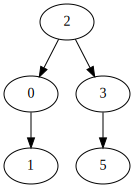

In [304]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

test3_tree = buildBinaryTree(test3)
dot = visualize_tree(test3_tree)

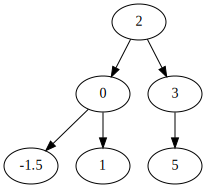

In [305]:
insert(test3_tree, -1.5)
dot = visualize_tree(test3_tree)

Let us write delete opertion. We will write another function minValueNode as well.

In [306]:
def minValueNode(node):
    current = node
 
    # loop down to find the leftmost leaf
    while(current.left is not None): # while node.left isnt empty take on the left node until so
        current = current.left # while true keep looping and selecting the left node each loop 
 
    return current

def delete(nodes, val): # tree and key

    if nodes == None:  
        return nodes

    if val < nodes.val:
        
        #if nodes.left:
        nodes.left = delete(nodes.left, val)

    elif val > nodes.val:
        
        #if nodes.right:
        nodes.right = delete(nodes.right, val)

    else:
        
        # Node with only one child or no child
        
        if nodes.left is None:
            temp = nodes.right
            nodes = None
            return temp
        elif nodes.right is None:
            temp = nodes.left
            nodes = None
            return temp
        
        # Nodes with two children: Get the inorder successor
        temp = minValueNode(nodes.right)
        
        nodes.val = temp.val
        
        nodes.right = delete(nodes.right, temp.val)
        
    return nodes

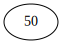

In [307]:
test3_tree = buildBinaryTree([50])
dot = visualize_tree(test3_tree)

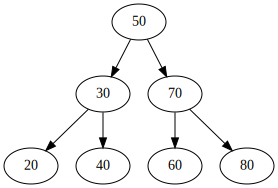

In [308]:
insert(test3_tree, 50)
insert(test3_tree, 30)
insert(test3_tree, 20)
insert(test3_tree, 40)
insert(test3_tree, 70)
insert(test3_tree, 60)
insert(test3_tree, 80)
#my input


dot = visualize_tree(test3_tree)

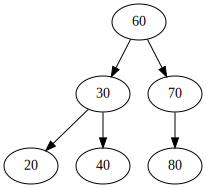

In [309]:
delete(test3_tree, 50)
dot = visualize_tree(test3_tree)

***

### <font color='red'> Section 4: Now that you have a good understanding of BST, write an algorithm (and code) to check if a binary search tree is balanced. For the purpose of this question, a balanced tree is defined to be a tree such that the heights of the two subtrees of any node never differs by more than one. </font>

In [310]:
### TODO ###
### Good Luck ###

# function to find height of binary tree
def height(root):
     
    # base condition when binary tree is empty
    if root is None:
        return 0
    return max(height(root.left), height(root.right)) + 1 #(+1 for the starting node)
 
# function to check if tree is height-balanced or not
def isBalanced(root):
     
    # Base condition
    if root is None:
        return True
 
    # for left and right subtree height
    lh = height(root.left)                          # height function
    rh = height(root.right)                         # height function
 
    # this is the
    if (abs(lh - rh) <= 1) and isBalanced(
    root.left) is True and isBalanced( root.right) is True:
        return True
 
    # if we reach here means tree is not
    # height-balanced tree
    return False

isBalanced(test3_tree)
# height(test3_tree)
# isBalanced(test2_tree)
# height(test2_tree)







True

***

### <font color='red'> Section 5: Write an algorithm (and code) to find the first common ancestor of two nodes in a binary search tree. </font>

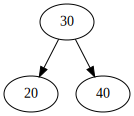

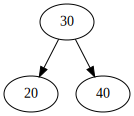

In [311]:
#### TODO ####
### Good Luck ###



def firstcommonancestor(root, n1, n2):
    while root:
        # If both n1 and n2 are smaller than root,
        # then LCA lies in left
        if root.val > n1 and root.val > n2:
            root = root.left
         
        # If both n1 and n2 are greater than root,
        # then LCA lies in right
        elif root.val < n1 and root.val < n2:
            root = root.right
 
        else:
            break
 
    return root

n1 = 20 ; n2 = 40
p = firstcommonancestor(test3_tree, n1, n2)
#print(p)
#print(vars(p))
visualize_tree(p)

# need t.val to get the answers from lca
# print ("LCA of %d and %d is %d" %(n1, n2, t(int)))
    

***

### <font color='red'> Section 6: Write an algorithm (and code) to perform a left and right rotation on any specified node of a BST? Your function should take in the tree, as well as a node as input argument, and then return a tree in which rotation is performed. </font>

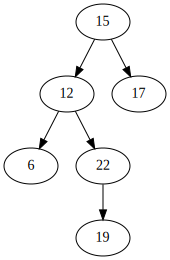

left rotation on 22


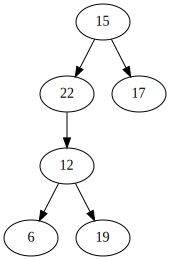

right rotation on 15


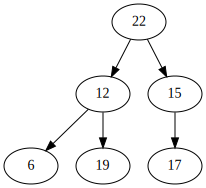

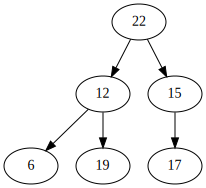

In [315]:
def rightRotate(node):
    if node is None or node.left is None:
        return node
    parent = node.parent
    left = node.left
    left_right = left.right

    # change edge 1
    if parent: # find out if node is a left or right child of node
        if parent.left == node:
            parent.left = left
        else:
            parent.right = left
    left.parent = parent

    # change edge 2
    left.right = node
    node.parent = left

    # change edge 3
    node.left = left_right
    if left_right:
        left_right.parent = node

    return left  # the node that took the position of node



def leftRotate(node):
    if node is None or node.right is None:
        return node
    parent = node.parent
    right = node.right
    right_left = right.left

         # change edge 1
    if parent: # find out if node is a left or right child of node
        if parent.right == node:
            parent.right = right
        else:
            parent.left = right
    right.parent = parent

    # change edge 2
    right.left = node
    node.parent = right

    # change edge 3
    node.right = right_left
    if right_left:
        right_left.parent = node

    return right  # the node that took the position of node


    
# your code to build the tree
#nodes
n_12 = Node(12)
n_22 = Node(22)
n_6 = Node(6)
n_15 = Node(15)
n_19 = Node(19)
n_17 = Node(17)

#rights and lefts
n_15.left = n_12
n_15.right = n_17
#
n_12.right = n_22
n_12.left = n_6
#
n_6.left = None
n_6.right = None
#
n_22.left = n_19

# parents\
n_15.parent = None
n_17.parent = n_15
n_12.parent = n_15
#

n_6.parent = n_12
n_22.parent = n_12
n_19.parent = n_22
#
root = n_15
visualize_tree(root)

# rotate the root
# root = change.parent
print("left rotation on 22")
change = n_12
change = leftRotate(change)
visualize_tree(root)
print("right rotation on 15")
root = rightRotate(root)
visualize_tree(root)


#we want to perform a right and then left rotation on this unbalanced tree to make it balanced.


# child = rightRotate(child)
# visualize_tree(root)
# height(child.right)
# visualize_tree(child)
# visualize_tree(root)
# # root = rightRotate(root)
# # visualize_tree(root)

# # root = rightRotate(root)
# # visualize_tree(root)



# root = rightRotate(root) # returns the node that took the place of n_
# visualize_tree(root)
# root=leftRotate(root)
# visualize_tree(root)
# leftRotate(n_6)
# visualize_tree(root)
# # root2 = n_6
# visualize_tree(root2)
# root2 = leftRotate(root2) # returns the node that took the place of n_
# visualize_tree(root2)

# visualize_tree(leftRotate(n_12))
# # root2 = leftRotate(root2) # returns the node that took the place of n_
# # visualize_tree(root2)


***

### Section 6: Insertion in an AVL Tree

In [313]:
class TreeNode(object):

    def __init__(self, val):
        
        self.val = val
        self.left = None
        self.right = None
        self.height = 1

class AVL_Tree(object):
 
    # Recursive function to insert key in
    # subtree rooted with node and returns
    # new root of subtree.
    def insert(self, root, key):
     
        # Step 1 - Perform normal BST
        if not root:
            return TreeNode(key)
        elif key < root.val:
            root.left = self.insert(root.left, key)
        else:
            root.right = self.insert(root.right, key)
 
        # Step 2 - Update the height of the
        # ancestor node
        root.height = 1 + max(self.getHeight(root.left),
                           self.getHeight(root.right))
 
        # Step 3 - Get the balance factor
        balance = self.getBalance(root)
 
        # Step 4 - If the node is unbalanced,
        # then try out the 4 cases
        # Case 1 - Left Left
        if balance > 1 and key < root.left.val:
            return self.rightRotate(root)
 
        # Case 2 - Right Right
        if balance < -1 and key > root.right.val:
            return self.leftRotate(root)
 
        # Case 3 - Left Right
        if balance > 1 and key > root.left.val:
            root.left = self.leftRotate(root.left)
            return self.rightRotate(root)
 
        # Case 4 - Right Left
        if balance < -1 and key < root.right.val:
            root.right = self.rightRotate(root.right)
            return self.leftRotate(root)
 
        return root
 
    def leftRotate(self, z):
 
        y = z.right
        T2 = y.left
 
        # Perform rotation
        y.left = z
        z.right = T2
 
        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                         self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                         self.getHeight(y.right))
 
        # Return the new root
        return y
 
    def rightRotate(self, z):
 
        y = z.left
        T3 = y.right
 
        # Perform rotation
        y.right = z
        z.left = T3
 
        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                        self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                        self.getHeight(y.right))
 
        # Return the new root
        return y
 
    def getHeight(self, root):
        if not root:
            return 0
 
        return root.height
 
    def getBalance(self, root):
        if not root:
            return 0
 
        return self.getHeight(root.left) - self.getHeight(root.right)
 


In [314]:
myTree = AVL_Tree()
root = None
 
root = myTree.insert(root, 10)
root = myTree.insert(root, 20)
root = myTree.insert(root, 30)
root = myTree.insert(root, 40)
root = myTree.insert(root, 50)
root = myTree.insert(root, 25)
root = myTree.insert(root, 60)
root = myTree.insert(root, 70)
root = myTree.insert(root, 80)


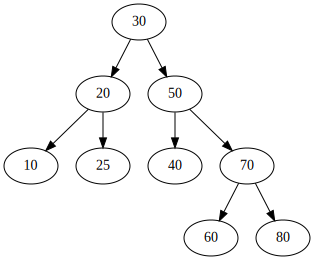

In [268]:
dot = visualize_tree(root)

***